## Importing Library

In [1]:
# Importing the NumPy and Pandas library with the alias 'np' with the alias 'pd'
import numpy as np  
import pandas as pd
# Importing the pyplot module from the Matplotlib library with the alias 'plt'
import matplotlib.pyplot as plt  
# Jupyter Notebook magic command to display Matplotlib plots inline
%matplotlib inline  
# Importing the Seaborn library with the alias 'sns'
import seaborn as sns  

## Load Data

In [2]:
#Load csv data and Display the data

df = pd.read_csv('Dataset/Lusi.csv')
df.head(8)

,Passenger ID,Family name,Title,Personal name,Fate,Age,Department/Class,Passenger/Crew,Citizenship,Position,Status,City,Lifeboat,Rescue Vessel,Adult/Minor,Sex
0,0,CAMERON,Mr.,Charles W.,Lost,38.0,Band,Crew,British,NaN,NaN,NaN,NaN,NaN,Adult,Male
1,1,CARR-JONES,Mr.,E.,Lost,37.0,Band,Crew,British,NaN,NaN,NaN,NaN,NaN,Adult,Male
2,2,DRAKEFORD,Mr.,Edward,Saved,30.0,Band,Crew,British,Violin,NaN,NaN,NaN,NaN,Adult,Male
3,3,HAWKINS,Mr.,Handel,Saved,25.0,Band,Crew,British,Cello,NaN,NaN,NaN,NaN,Adult,Male
4,4,HEMINGWAY,Mr.,John William,Saved,27.0,Band,Crew,British,Double Bass,NaN,NaN,NaN,NaN,Adult,Male
5,5,ANDERSON,Mr.,James Clarke,Lost,48.0,Deck,Crew,British,Staff Captain,NaN,Liverpool,NaN,NaN,Adult,Male
6,6,ANDERSON,Mr.,John,Lost,NaN,Deck,Crew,Norwegian,Able-Bodied Seaman,NaN,NaN,NaN,NaN,Adult,Male
7,7,BATTLE,Mr.,James,Saved,NaN,Deck,Crew,British,Able-Bodied Seaman,NaN,Sligo,Found Lifeboat,Found by Rescue Vessel,Adult,Male


## Check Data Condition

In [3]:
#Check Data Condition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Passenger ID      1961 non-null   int64  
 1   Family name       1961 non-null   object 
 2   Title             1961 non-null   object 
 3   Personal name     1958 non-null   object 
 4   Fate              1961 non-null   object 
 5   Age               1299 non-null   float64
 6   Department/Class  1961 non-null   object 
 7   Passenger/Crew    1961 non-null   object 
 8   Citizenship       1959 non-null   object 
 9   Position          691 non-null    object 
 10  Status            791 non-null    object 
 11  City              1279 non-null   object 
 12  Lifeboat          94 non-null     object 
 13  Rescue Vessel     151 non-null    object 
 14  Adult/Minor       1961 non-null   object 
 15  Sex               1961 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

In [4]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage': missing_percentages.values
})
print(missing_info)

              Column  Missing Values  Missing Percentage
0       Passenger ID               0            0.000000
1        Family name               0            0.000000
2              Title               0            0.000000
3      Personal name               3            0.152983
4               Fate               0            0.000000
5                Age             662           33.758287
6   Department/Class               0            0.000000
7     Passenger/Crew               0            0.000000
8        Citizenship               2            0.101989
9           Position            1270           64.762876
10            Status            1170           59.663437
11              City             682           34.778174
12          Lifeboat            1867           95.206527
13     Rescue Vessel            1810           92.299847
14       Adult/Minor               0            0.000000
15               Sex               0            0.000000


In [5]:
#show the proportion of Position column data
df.Position.value_counts()

Position
Fireman                              145
Trimmer                               99
First Waiter                          53
Able-Bodied Seaman                    42
Waiter                                25
                                    ... 
Third Electrician                      1
Junior 4th Engineer                    1
Chief Electrician                      1
Third Senior 3rd Engineer              1
Barkeeper, Smokeroom Second Cabin      1
Name: count, Length: 150, dtype: int64

In [6]:
#show the proportion of Lifeboat column data
df.Lifeboat.value_counts()

Lifeboat
Found Lifeboat    94
Name: count, dtype: int64

In [7]:
#show the proportion of Rescue Vessel column data
df['Rescue Vessel'].value_counts()

Rescue Vessel
Found by Rescue Vessel    151
Name: count, dtype: int64

In [8]:
#check data duplicate
df.duplicated().sum()

0

In [9]:
#dropped due to their high percentage of missing data more than 50% and the data not to important
df.drop(['Position', 'Lifeboat', 'Rescue Vessel'], axis=1, inplace = True)

In [10]:
#Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Passenger ID      1961 non-null   int64  
 1   Family name       1961 non-null   object 
 2   Title             1961 non-null   object 
 3   Personal name     1958 non-null   object 
 4   Fate              1961 non-null   object 
 5   Age               1299 non-null   float64
 6   Department/Class  1961 non-null   object 
 7   Passenger/Crew    1961 non-null   object 
 8   Citizenship       1959 non-null   object 
 9   Status            791 non-null    object 
 10  City              1279 non-null   object 
 11  Adult/Minor       1961 non-null   object 
 12  Sex               1961 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 199.3+ KB


In [11]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage': missing_percentages.values
})
print(missing_info)

              Column  Missing Values  Missing Percentage
0       Passenger ID               0            0.000000
1        Family name               0            0.000000
2              Title               0            0.000000
3      Personal name               3            0.152983
4               Fate               0            0.000000
5                Age             662           33.758287
6   Department/Class               0            0.000000
7     Passenger/Crew               0            0.000000
8        Citizenship               2            0.101989
9             Status            1170           59.663437
10              City             682           34.778174
11       Adult/Minor               0            0.000000
12               Sex               0            0.000000


## Handling Missing Values

In [12]:
#Handling Personal name and City missing values
df['Status'].fillna('Unknown', inplace=True)
df['Personal name'].fillna('Unknown', inplace=True)
df['City'].fillna('Unknown', inplace=True)

In [13]:
#Handling Citizien ship missing values
val = df.Citizenship.mode().values[0]
df['Citizenship'] = df.Citizenship.fillna(val)

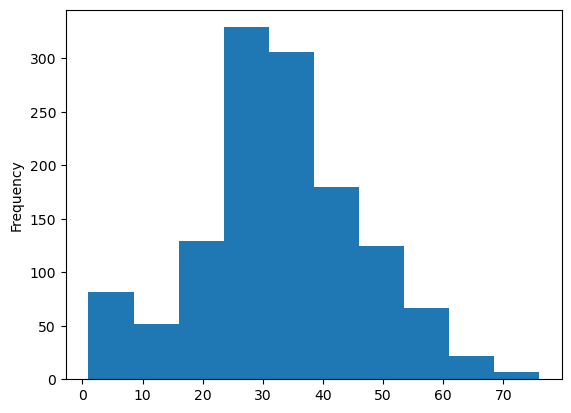

In [14]:
#Show the column visualization and check the Age data distribution
df.Age.plot(kind='hist');

In [15]:
#Handling Age missing values
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

In [16]:
df

,Passenger ID,Family name,Title,Personal name,Fate,Age,Department/Class,Passenger/Crew,Citizenship,Status,City,Adult/Minor,Sex
0,0,CAMERON,Mr.,Charles W.,Lost,38.0,Band,Crew,British,Unknown,Unknown,Adult,Male
1,1,CARR-JONES,Mr.,E.,Lost,37.0,Band,Crew,British,Unknown,Unknown,Adult,Male
2,2,DRAKEFORD,Mr.,Edward,Saved,30.0,Band,Crew,British,Unknown,Unknown,Adult,Male
3,3,HAWKINS,Mr.,Handel,Saved,25.0,Band,Crew,British,Unknown,Unknown,Adult,Male
4,4,HEMINGWAY,Mr.,John William,Saved,27.0,Band,Crew,British,Unknown,Unknown,Adult,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,WOOD,Mr.,Alfred,Saved,32.0,Victualling,Crew,British,Unknown,Unknown,Adult,Male
1957,1957,WOOD,Mr.,Wallace Edkin,Lost,32.0,Victualling,Crew,British,Unknown,Unknown,Adult,Male
1958,1958,WRIGHT,Master,Harold Joseph,Lost,32.0,Victualling,Crew,British,Unknown,Unknown,Minor,Male
1959,1959,WYNNE,Master,George,Saved,16.0,Victualling,Crew,British,Unknown,Liverpool,Minor,Male


In [17]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage': missing_percentages.values
})
print(missing_info)

              Column  Missing Values  Missing Percentage
0       Passenger ID               0                 0.0
1        Family name               0                 0.0
2              Title               0                 0.0
3      Personal name               0                 0.0
4               Fate               0                 0.0
5                Age               0                 0.0
6   Department/Class               0                 0.0
7     Passenger/Crew               0                 0.0
8        Citizenship               0                 0.0
9             Status               0                 0.0
10              City               0                 0.0
11       Adult/Minor               0                 0.0
12               Sex               0                 0.0


## Data Manipulation

**Sorting**

In [18]:
# Sorting DataFrame column 'Age' by ascending
df_sorted = df.sort_values(by='Age', ascending=True)
df_sorted.head()

,Passenger ID,Family name,Title,Personal name,Fate,Age,Department/Class,Passenger/Crew,Citizenship,Status,City,Adult/Minor,Sex
1320,1320,BLACKSHAW,Master,John J.,Lost,1.0,Third,Passenger,British,Single,St Thomas,Infant,Male
879,879,GROVES,Master,Frederick,Lost,1.0,Second,Passenger,British,Single,Toronto,Infant,Male
591,591,PEARL,Miss,Susan Whitewright,Lost,1.0,Saloon,Passenger,USA,Single,New York,Infant,Female
953,953,LAMBIE,Miss,Mary,Lost,2.0,Second,Passenger,British,Single,Roslyn,Minor,Female
1181,1181,STOKES,Master,William,Lost,2.0,Second,Passenger,British,Single,Victoria,Minor,Male


**Pivot Table Visualization**

Passenger ID      
Fate           Lost Saved
Sex                      
Female          325   193
Male            868   575

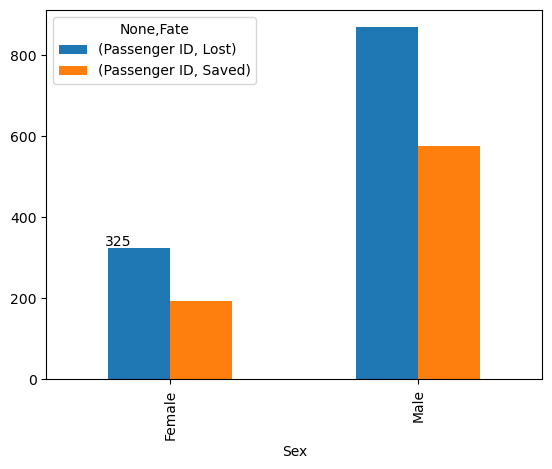

In [19]:
#Pivot Table Visualization
def make_pivot(param1, param2):
    df_slice = df[[param1, param2, 'Passenger ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns =[param2], \
                                      aggfunc=np.size,fill_value=0)
    p_chart= slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
        return slice_pivot
        return p_chart

make_pivot('Sex', 'Fate')

**Pivot Slicing**

In [20]:
#Pivot Slicing
df_slice = df[['Fate', 'Sex','Passenger/Crew', 'Passenger ID']]
slice_pivot = df_slice.pivot_table(index=['Fate', 'Sex'], columns=['Passenger/Crew'], \
                                  aggfunc=np.size,fill_value=0)
slice_pivot

Passenger ID                   
Passenger/Crew         Crew Passenger Stowaway
Fate  Sex                                     
Lost  Female             16       309        0
      Male              386       479        3
Saved Female              9       184        0
      Male              282       293        0

**Get Dummies**

In [21]:
#Get Dummies
df_slice = df[['Fate', 'Sex']]
pd.get_dummies(df_slice,'Passenger/Crew', dtype=int)

,Passenger/Crew_Lost,Passenger/Crew_Saved,Passenger/Crew_Female,Passenger/Crew_Male
0,1,0,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1
...,...,...,...,...
1956,0,1,0,1
1957,1,0,0,1
1958,1,0,0,1
1959,0,1,0,1


**Filtering data**

In [22]:
# Filtering data to display passengers over 30 years old
filtered_df = df[df['Age'] > 30]
filtered_df.head()

,Passenger ID,Family name,Title,Personal name,Fate,Age,Department/Class,Passenger/Crew,Citizenship,Status,City,Adult/Minor,Sex
0,0,CAMERON,Mr.,Charles W.,Lost,38.0,Band,Crew,British,Unknown,Unknown,Adult,Male
1,1,CARR-JONES,Mr.,E.,Lost,37.0,Band,Crew,British,Unknown,Unknown,Adult,Male
5,5,ANDERSON,Mr.,James Clarke,Lost,48.0,Deck,Crew,British,Unknown,Liverpool,Adult,Male
6,6,ANDERSON,Mr.,John,Lost,32.0,Deck,Crew,Norwegian,Unknown,Unknown,Adult,Male
7,7,BATTLE,Mr.,James,Saved,32.0,Deck,Crew,British,Unknown,Sligo,Adult,Male


**Grouping**

In [23]:
#Grouping
df[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
Female,31.756757
Male,32.732502


**Councat**

In [24]:
df1 = df[['Passenger ID', 'Personal name', 'Sex']][0:5]
df1

,Passenger ID,Personal name,Sex
0,0,Charles W.,Male
1,1,E.,Male
2,2,Edward,Male
3,3,Handel,Male
4,4,John William,Male


In [25]:
df2 = df[['Passenger ID', 'Personal name', 'Sex']][875:890]
df2

,Passenger ID,Personal name,Sex
875,875,Ronald Sutcliffe,Male
876,876,Christopher William,Male
877,877,Arthur,Male
878,878,Sydney Frederick,Male
879,879,Frederick,Male
880,880,Sydney Frederick (Clara Lee),Female
881,881,Herbert Linford,Male
882,882,Herbert Linford (Margaret Inglis Adams Cairns),Female
883,883,James Harold,Male
884,884,James Cargill,Male


In [26]:
df_concat = pd.concat([df1,df2])
df_concat_sorted = df_concat.sort_values(by='Sex', ascending=False)
df_concat_sorted

,Passenger ID,Personal name,Sex
0,0,Charles W.,Male
2,2,Edward,Male
3,3,Handel,Male
4,4,John William,Male
875,875,Ronald Sutcliffe,Male
876,876,Christopher William,Male
877,877,Arthur,Male
878,878,Sydney Frederick,Male
879,879,Frederick,Male
1,1,E.,Male


**Merge**

In [27]:
df_1 = df[['Passenger ID', 'Personal name', 'Sex']][0:5]
df_1

,Passenger ID,Personal name,Sex
0,0,Charles W.,Male
1,1,E.,Male
2,2,Edward,Male
3,3,Handel,Male
4,4,John William,Male


In [28]:
df_2 = df[['Passenger ID', 'Age', 'Fate']][0:5]
df_2

,Passenger ID,Age,Fate
0,0,38.0,Lost
1,1,37.0,Lost
2,2,30.0,Saved
3,3,25.0,Saved
4,4,27.0,Saved


In [29]:
pd_merge = pd.merge(df_1, df_2, on=['Passenger ID'])
pd_merge

,Passenger ID,Personal name,Sex,Age,Fate
0,0,Charles W.,Male,38.0,Lost
1,1,E.,Male,37.0,Lost
2,2,Edward,Male,30.0,Saved
3,3,Handel,Male,25.0,Saved
4,4,John William,Male,27.0,Saved
